In [1]:
import numpy as np
from pathlib import Path
from keras.preprocessing import image 
import matplotlib.pyplot as plt


In [2]:
p=Path('../desktop/images')

In [3]:
dirs=p.glob("*")

In [5]:
image_data=[]
labels=[]
for folder_path in dirs:
    creature_name=str(folder_path).split('\\')[-1]
    print(creature_name)
    for img_path in folder_path.glob('*.jpg'):
        img=image.load_img(img_path,target_size=(150,150))
        img_array=image.img_to_array(img)
        labels.append(creature_name)
        image_data.append(img_array)
    

cats
dogs
horses
humans


In [6]:
len(image_data)

648

In [7]:
len(labels)

648

In [7]:
image_data=np.array(image_data,dtype='float32')/255

In [8]:
def draw(im):
    plt.imshow(im)
    plt.axis('off')
    plt.show()

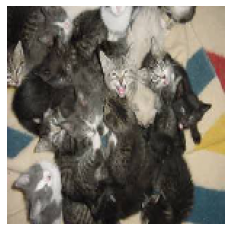

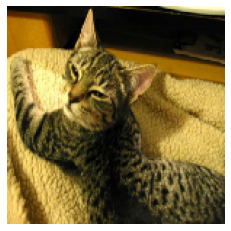

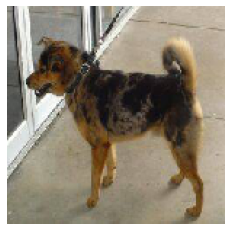

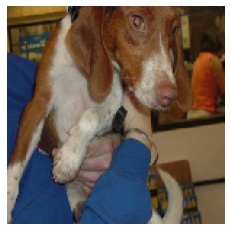

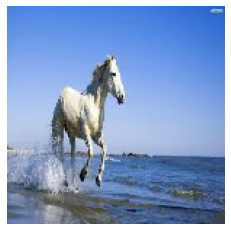

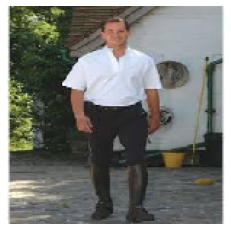

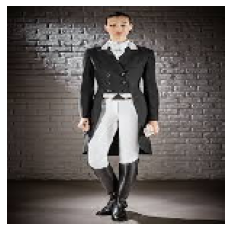

In [9]:
ind=[100,200,250,400,450,650,700]
for i in ind:
    draw(image_data[i])


In [10]:
image_data.shape

(808, 150, 150, 3)

In [11]:
labels=np.array(labels)
labels=labels.reshape((-1,1))

In [12]:
labels.shape

(808, 1)

In [13]:
image_data=image_data.reshape((808,-1))

In [14]:
image_data.shape

(808, 67500)

#randomly shuffling the data to avoid any biased results

In [15]:
shuffled_data=np.hstack((labels,image_data))
np.random.shuffle(shuffled_data)

In [17]:
labels=shuffled_data[:,0]
image_data=shuffled_data[:,1:]


In [19]:
image_data=image_data.reshape((808,150,150,3))

In [23]:
image_data=image_data.astype('float32')

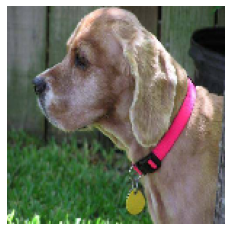

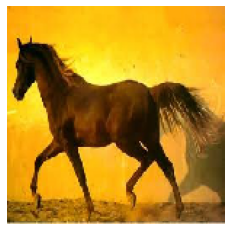

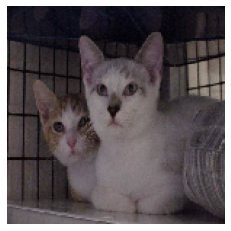

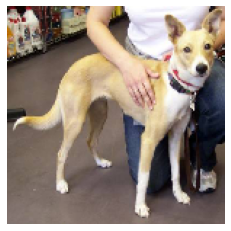

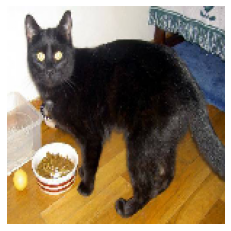

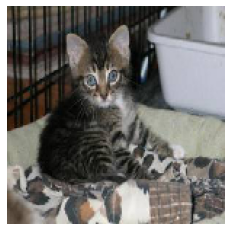

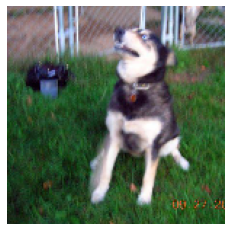

In [24]:
ind=[100,200,250,400,450,650,700]
for i in ind:
    draw(image_data[i])


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le= LabelEncoder()

In [27]:
labels=le.fit_transform(labels)

#performing one hot encoding to the labels

In [29]:
from keras.utils.np_utils import to_categorical

In [30]:
labels= to_categorical(labels)

In [31]:
labels.shape

(808, 4)

In [10]:
from keras.models import Sequential
from keras.layers import *

In [45]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 64)        102464    
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 64)       

In [46]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [52]:
hist = model.fit(image_data,labels,epochs=20,validation_split=0.1,batch_size=50)

Epoch 1/20
15/15 [==============================] - 22s 1s/step - loss: 1.3896 - accuracy: 0.2985 - val_loss: 1.3596 - val_accuracy: 0.3704
Epoch 2/20
15/15 [==============================] - 15s 1s/step - loss: 1.3057 - accuracy: 0.3535 - val_loss: 1.1828 - val_accuracy: 0.4938
Epoch 3/20
15/15 [==============================] - 16s 1s/step - loss: 1.1523 - accuracy: 0.4979 - val_loss: 1.1314 - val_accuracy: 0.5309
Epoch 4/20
15/15 [==============================] - 15s 1s/step - loss: 1.0449 - accuracy: 0.5681 - val_loss: 1.0969 - val_accuracy: 0.4938
Epoch 5/20
15/15 [==============================] - 16s 1s/step - loss: 0.9162 - accuracy: 0.6300 - val_loss: 1.0615 - val_accuracy: 0.5185
Epoch 6/20
15/15 [==============================] - 15s 996ms/step - loss: 0.8278 - accuracy: 0.6547 - val_loss: 0.9693 - val_accuracy: 0.6296
Epoch 7/20
15/15 [==============================] - 15s 992ms/step - loss: 0.8087 - accuracy: 0.6685 - val_loss: 1.0876 - val_accuracy: 0.5062
Epoch 8/20
15/

In [53]:
model.evaluate(image_data,labels)

26/26 [==============================] - 3s 116ms/step - loss: 0.2024 - accuracy: 0.9493


[0.20237472653388977, 0.9492574334144592]

#we got training accuracy as approx 95%

#MODEL.FIT() IS USED WHEN OUR DATASET IS SMALL AND IS ABLE TO FIT IN THE MEMORY EASILY BUT IF OUR DATA IS HUGE THEN WE HAVE TO USE DATA GENERATORS WHICH CAN BE IMPORTED FROM KERAS LIBRARY, HERE WE CAN DIRECTLY PREPARE OUR DATA IMAGES FROM FLOE_FROM_DIRECTORY METHOD!

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import *

In [2]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(16,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 16)        0

In [61]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

#MAKING A VALIDATION IMAGE FOLDER WHICH WILL BE USED FOR VALIDATION 

In [ ]:
import os
import shutil

In [108]:
if not os.path.isdir('../desktop/val_images'):
    os.mkdir('../desktop/val_images')
    

In [109]:
classes=['cats','dogs','horses','humans']

In [110]:
for c in classes:
    p=os.path.join('../desktop/val_images',c)
    if not os.path.isdir(p):
        os.mkdir(p)
split=0.9
for f in os.listdir('../desktop/images'):
    path='../desktop/images/'+f
    img=os.listdir(path)
    split_size=int(split*len(img))
    files_to_move=img[split_size:]
    for val_img in files_to_move:
        s=os.path.join(path,val_img)
        d=os.path.join('../desktop/val_images/'+f,val_img)
        shutil.move(s,d)
    
    

In [62]:
train_gen=ImageDataGenerator(rescale=1.0/255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.3,horizontal_flip=True)
train_generator=train_gen.flow_from_directory(
'../desktop/images',
target_size=(150,150),
batch_size=32,
class_mode='categorical'    
)

Found 648 images belonging to 4 classes.


In [63]:
val_gen=ImageDataGenerator(rescale=1.0/255)
val_generator=train_gen.flow_from_directory(
'../desktop/val_images',
target_size=(150,150),
batch_size=32,
class_mode='categorical'    
)

Found 160 images belonging to 4 classes.


In [83]:
hist2=model.fit_generator(train_generator,epochs=40,validation_data=val_generator)

Epoch 1/40
21/21 [==============================] - 14s 675ms/step - loss: 0.4869 - accuracy: 0.7948 - val_loss: 0.9084 - val_accuracy: 0.7125
Epoch 2/40
21/21 [==============================] - 16s 764ms/step - loss: 0.4319 - accuracy: 0.8179 - val_loss: 0.8464 - val_accuracy: 0.7063
Epoch 3/40
21/21 [==============================] - 16s 750ms/step - loss: 0.4723 - accuracy: 0.8071 - val_loss: 0.8107 - val_accuracy: 0.7312
Epoch 4/40
21/21 [==============================] - 17s 784ms/step - loss: 0.5200 - accuracy: 0.7917 - val_loss: 0.7484 - val_accuracy: 0.6812
Epoch 5/40
21/21 [==============================] - 15s 725ms/step - loss: 0.4681 - accuracy: 0.8179 - val_loss: 0.7511 - val_accuracy: 0.6938
Epoch 6/40
21/21 [==============================] - 16s 751ms/step - loss: 0.4898 - accuracy: 0.7932 - val_loss: 0.9191 - val_accuracy: 0.6687
Epoch 7/40
21/21 [==============================] - 17s 779ms/step - loss: 0.4559 - accuracy: 0.8210 - val_loss: 0.7415 - val_accuracy: 0.7375

In [84]:
model.evaluate(train_generator)

21/21 [==============================] - 5s 236ms/step - loss: 0.3804 - accuracy: 0.8642


[0.38039886951446533, 0.8641975522041321]

In [91]:
model.evaluate(val_generator)

5/5 [==============================] - 1s 227ms/step - loss: 0.8587 - accuracy: 0.7375


[0.8586645126342773, 0.737500011920929]

#Training Accuracy we got is  86% with a validation score of almost 74%!